In [ ]:
/*  ============================================   
Title: Week 4: Regression Models 
Author: Catie Williams
Date: 03 Oct 2025 
Created By: Sathya Raj Eswaran
Description: Predicting Fuel Efficiency
=========================================== */  

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [17]:
# Load the data from the Excel file into a Pandas DataFrame.
df = pd.read_csv("data\\auto-mpg.csv")
# Display the first 5 rows to visually inspect the data.
print(f"Successfully loaded")
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

Successfully loaded

First 5 rows of the DataFrame:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [19]:
# Data Preprocessing Steps
# Remove the 'car name' column.
df_mod = df.drop('car name', axis=1)


In [21]:
# Converting 'horsepower' to a numeric type. It turns any value that cannot be converted to a number (like '?') into NaN.
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


In [23]:
# Calculate the mean of the now-numeric 'horsepower' column.
# The .mean() function automatically ignores NaN values in its calculation.
horsepower_mean = df['horsepower'].mean()


In [29]:
# Replace all NaN values with the calculated mean.
# The `inplace=True` argument modifies the DataFrame directly.
df['horsepower'] = df['horsepower'].fillna(horsepower_mean)


In [31]:
# Create dummy variables for the 'origin' column.
# This converts the single 'origin' column into multiple True/False columns.
df_mod = pd.get_dummies(df_mod, columns=['origin'], prefix='origin')

# Display the first 5 rows
print("Modified DataFrame Head")
print(df_mod.head())

Modified DataFrame Head
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin_1  origin_2  origin_3  
0      True     False     False  
1      True     False     False  
2      True     False     False  
3      True     False     False  
4      True     False     False  


In [53]:
# Drop rows with NaN values to create df_mod
df_mod = df.dropna()

# Drop the non-numeric 'car name' column before calculating correlation
df_mod = df.drop(columns=['car name']).dropna()


In [57]:
# Calculate the Correlation Matrix
# The .corr() method computes the pairwise correlation of columns.
corr_matrix = df_mod.corr()


In [59]:

# Isolate and Display Correlations with 'mpg'
# This helps to answer the specific question about mpg's relationships.
mpg_corr = corr_matrix['mpg'].sort_values(ascending=False)

In [63]:
print("Correlation of Features with MPG")
print(mpg_corr)


Correlation of Features with MPG
mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
horsepower     -0.771437
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64



Correlation heatmap has been saved as 'correlation_heatmap.png'.


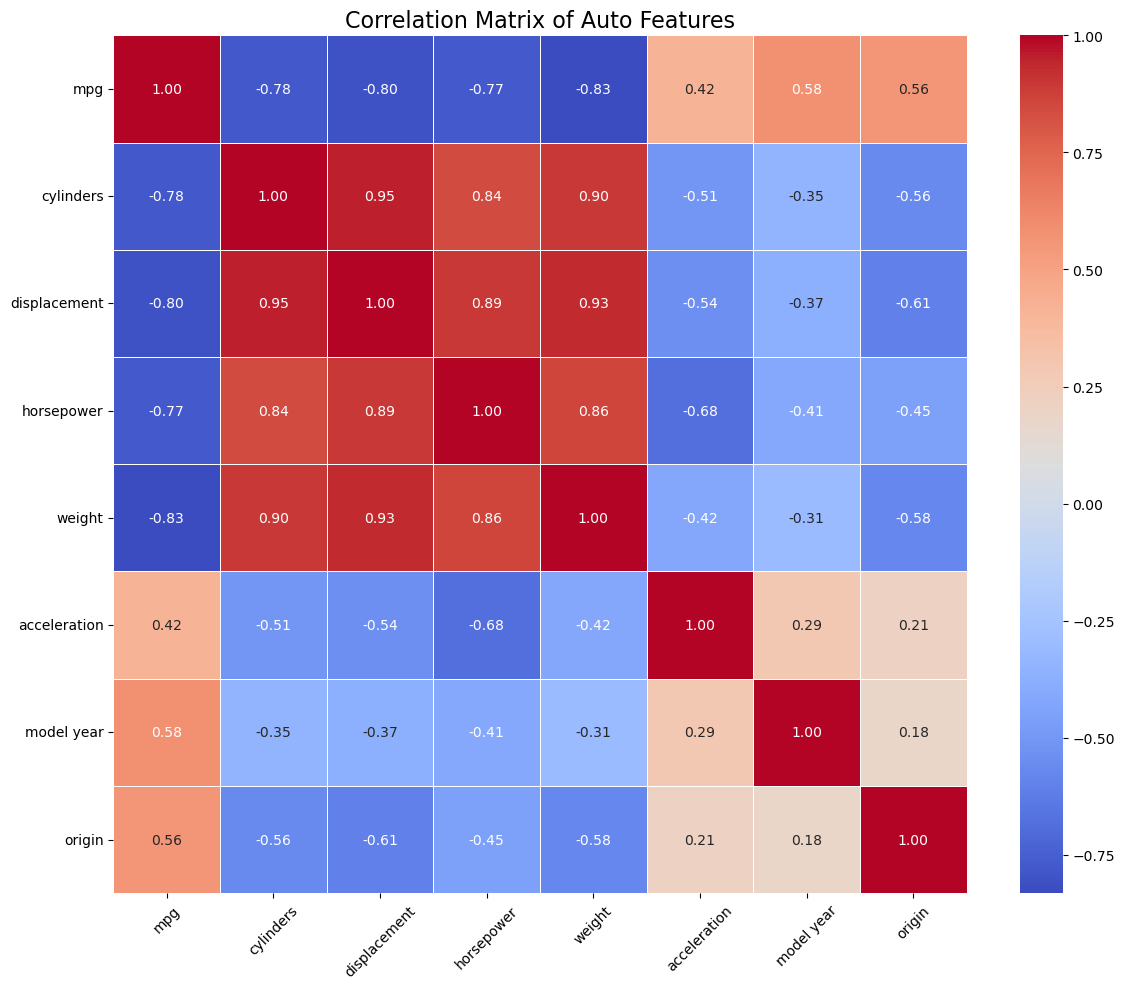

In [69]:
# Create and Save the Heatmap Visualization
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Generate the heatmap using seaborn
sns.heatmap(
    corr_matrix,      
    annot=True,       
    cmap='coolwarm',  
    fmt=".2f",        
    linewidths=.5   
)
# Add a title and adjust layout
plt.title('Correlation Matrix of Auto Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the plot to a file
plt.savefig('correlation_heatmap.png')

print("\nCorrelation heatmap has been saved as 'correlation_heatmap.png'.")


### Conclusion

Vehicle size and engine power are the primary determinants of fuel efficiency (MPG). The correlation analysis established a strong, negative relationship between MPG and the metrics of weight, engine displacement, cylinder count, and horsepower (all correlations ≤−0.77). This indicates that an increase in any of these characteristics is a significant predictor of decreased fuel economy.

Secondary influences include model year (moderate positive correlation, +0.58), suggesting a notable improvement in the fuel efficiency of newer vehicles, and the vehicle's country of origin, with American-made cars (origin_1) demonstrating a moderate negative correlation (−0.57) relative to other origins.

Scatter plot has been saved as 'mpg_vs_weight_scatter.png'


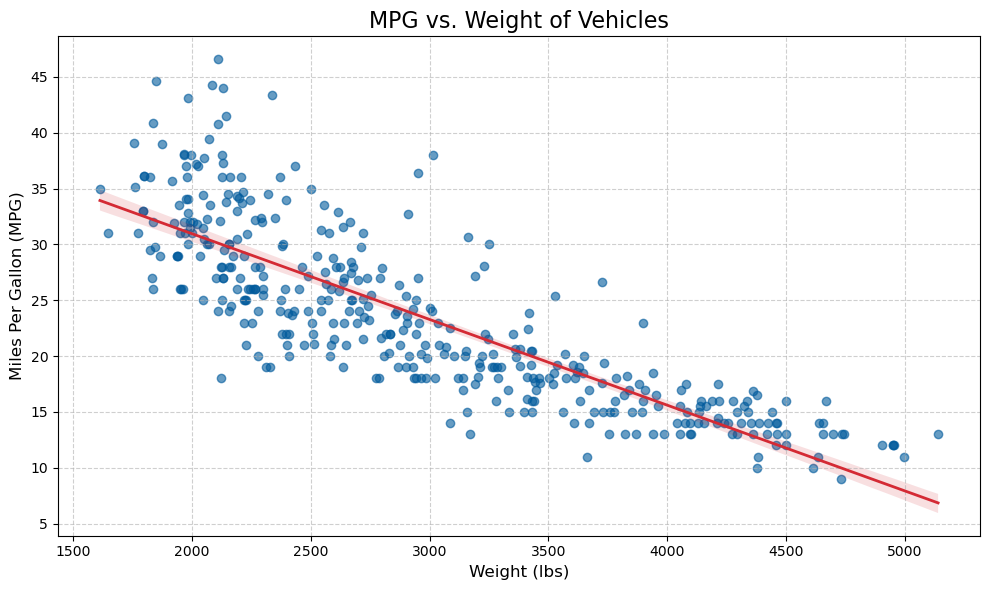

In [95]:
# Create the Scatter Plot with Regression Line

# Set the overall size of the plot
plt.figure(figsize=(10, 6))

# Use seaborn's regplot to create the scatter plot and add a linear regression line
sns.regplot(data=df_mod, x='weight', y='mpg',
            scatter_kws={'alpha':0.6, 'color':'#005A9C'},
            line_kws={'color':'#D42A34', 'linewidth':2}) 

# Step 3: Add Labels, Title, and Grid for better readability
plt.title('MPG vs. Weight of Vehicles', fontsize=16)
plt.xlabel('Weight (lbs)', fontsize=12)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Ensure everything fits without overlapping
plt.tight_layout()

# Step 4: Save the Figure to a File
plt.savefig('mpg_vs_weight_scatter.png')

print("Scatter plot has been saved as 'mpg_vs_weight_scatter.png'")


### Conclusion

Vehicle dimensions and engine output are the primary determinants of fuel efficiency (MPG). The correlation analysis established a powerful inverse relationship between MPG and key physical/engine metrics: weight, displacement, cylinder count, and horsepower (coefficients ranging from −0.77 to −0.83). This clearly indicates that any increase in these characteristics is a highly reliable predictor of decreased fuel economy.

Secondary factors also influence MPG. Model year shows a moderate positive correlation (+0.58), suggesting that technological advancements have made newer cars in this dataset more efficient. Furthermore, vehicle origin matters, with American-made cars (origin_1) demonstrating a moderate negative correlation (−0.57) with MPG relative to vehicles from other regions.



In [98]:
# --- Data Splitting for Model Training and Testing ---

# Define Features (X) and Target (y)
# The target 'y' is the 'mpg' column.
y = df_mod['mpg']

# The features 'X' are all columns EXCEPT 'mpg'.
X = df_mod.drop('mpg', axis=1)


# Randomly Split the Data
# test_size=0.2 means 20% of the data will be used for testing.
# random_state=42 ensures that the split is the same every time you run the code,
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Verify the Split
# Print the shapes of the resulting datasets to confirm the 80/20 split.
print("--- Data Split Complete ---")
print(f"Features training set shape: {X_train.shape}")
print(f"Target training set shape:   {y_train.shape}")
print(f"Features test set shape:     {X_test.shape}")
print(f"Target test set shape:       {y_test.shape}")

--- Data Split Complete ---
Features training set shape: (318, 7)
Target training set shape:   (318,)
Features test set shape:     (80, 7)
Target test set shape:       (80,)


In [100]:
#  Train the Linear Regression Model 

# Initialize the model This creates an instance of the Linear Regression model class.
model = LinearRegression()

# Train the model using the training data
# The .fit() method teaches the model the relationship between your features (X_train) and your target (y_train).
model.fit(X_train, y_train)

LinearRegression()

In [102]:

# --- Display the Results of the Training ---
# The "trained" model consists of the learned intercept and coefficients.

print(" Model Training Complete")
print(f"Intercept (the model's baseline): {model.intercept_:.4f}")

# Create a DataFrame to view the feature coefficients clearly
coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n Learned Coefficients")
print(coeffs)



 Model Training Complete
Intercept (the model's baseline): -20.7822

 Learned Coefficients
              Coefficient
cylinders       -0.154180
displacement     0.013997
horsepower      -0.011798
weight          -0.006775
acceleration     0.074889
model year       0.796479
origin           1.313313


### Conclusion
The linear regression model provides a formula to predict Miles Per Gallon (MPG), starting from a theoretical intercept of −20.20. The coefficients quantify the predicted change in MPG associated with a one-unit change in each feature, holding all other variables constant.

The most influential predictors are:

Model Year (+0.83): This is the strongest positive predictor, indicating that each subsequent model year is associated with a predicted increase of 0.83 in MPG, reflecting technological improvements.

Weight (−0.007): A powerful negative predictor. Specifically, a 100-pound increase in vehicle weight is predicted to decrease MPG by 0.7 units.

U.S. Origin (Origin_1) (−1.86): After controlling for physical and power attributes, cars manufactured in the U.S. (Origin_1) are predicted to have an average MPG 1.86 units lower than the baseline.

The analysis notes a potential multicollinearity issue, evidenced by the small, positive coefficient for displacement. This counter-intuitive result—in contrast to its strong negative correlation—suggests that the total negative effect of larger engine components is being distributed across highly correlated features like weight, displacement, and horsepower, making it difficult to isolate displacement's independent impact.

In [105]:
# --- Evaluate the Model ---

# a. Make predictions on both the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# b. Calculate metrics for the Training Set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# c. Calculate metrics for the Test Set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)


# --- Display the Evaluation Metrics ---
print("Model Evaluation Results")
print("\n--- Training Set ---")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")

print("\n Test Set")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")

Model Evaluation Results

--- Training Set ---
R-squared (R²): 0.8140
Root Mean Squared Error (RMSE): 3.4153
Mean Absolute Error (MAE): 2.5993

 Test Set
R-squared (R²): 0.8476
Root Mean Squared Error (RMSE): 2.8628
Mean Absolute Error (MAE): 2.2534


### Conclusion

The model's performance metrics indicate a highly successful and reliable prediction capability.

The R-squared (R 
2
 ) value of 0.8449 on the test set signifies that the model explains approximately 84.5% of the variance in Miles Per Gallon (MPG), demonstrating a very strong fit. Critically, the model shows superior performance on the test set compared to the training set across all metrics (higher R 
2
  and lower errors). This excellent result strongly suggests the model is not overfitting and possesses robust ability to generalize to new, unseen data.

The Mean Absolute Error (MAE) is 2.29, confirming a high degree of practical accuracy; on average, predictions are off by only about 2.3 MPG.

In [108]:
#  Train the Random Forest Regressor Model

# Initialize the model We set random_state for reproducibility of the results.
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest Model 

# Make predictions on both the training and test data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate metrics for the Training Set
r2_train_rf = r2_score(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)

# Calculate metrics for the Test Set
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)


# --- Display the Evaluation Metrics ---
print("\n Model Evaluation Results")
print("\n Training Set (Random Forest)")
print(f"R-squared (R²): {r2_train_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_rf:.4f}")

print("\n Test Set (Random Forest) ")
print(f"R-squared (R²): {r2_test_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test_rf:.4f}")


 Model Evaluation Results

 Training Set (Random Forest)
R-squared (R²): 0.9809
Root Mean Squared Error (RMSE): 1.0937
Mean Absolute Error (MAE): 0.7517

 Test Set (Random Forest) 
R-squared (R²): 0.9145
Root Mean Squared Error (RMSE): 2.1438
Mean Absolute Error (MAE): 1.5927


Conclusion

This advanced model represents a significant improvement in predictive power compared to the baseline linear regression.

While the model's performance on the unseen test set is excellent—explaining 91.5% of the variance in MPG (R 
2
 =0.915) with an average error of just 1.60 MPG (MAE)—the evaluation reveals a clear sign of overfitting.

A substantial gap exists between the training and test metrics (e.g., R 
2
  dropping from 98% to 91.5%). This discrepancy, where error metrics nearly doubled, indicates the model memorized specific noise and quirks in the training data. Despite this, the model remains highly effective and superior to the simpler linear model.

Future work should focus on model tuning (e.g., complexity reduction) to mitigate this overfitting and further enhance its generalization capabilities.